<a href="https://colab.research.google.com/github/racarvajal/Intro_Notebooks_ML/blob/main/Using_PyCaret_notebook_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Short introduction to *PyCaret* for Machine Learning

**PyCaret** (https://pycaret.org) can help us using several Machine Learning (ML) methods and algorithms to predict values from an existing dataset.  

We can install it using  

````bash
    !pip install pycaret
````  

We will also install and update some other packages to use with PyCaret.

In [ ]:
!pip install pandas markupsafe==2.0.1 Jinja2 pycaret colorcet numpy==1.19.5 ppscore pacmap "numba<0.55" tbb borutashap shap umap-learn trimap sklearn-som --upgrade catboost --upgrade xgboost mpl-scatter-density tune-sklearn ray[tune]

     |████████████████████████████████| 133 kB 5.4 MB/s 
     |████████████████████████████████| 320 kB 39.3 MB/s 
     |████████████████████████████████| 14.8 MB 35.5 MB/s 
     |████████████████████████████████| 47 kB 2.4 MB/s 
     |████████████████████████████████| 3.3 MB 16.6 MB/s 
     |████████████████████████████████| 4.0 MB 25.8 MB/s 
     |████████████████████████████████| 564 kB 20.0 MB/s 
     |████████████████████████████████| 88 kB 3.8 MB/s 
     |████████████████████████████████| 76.6 MB 1.4 MB/s 
     |████████████████████████████████| 193.7 MB 31 kB/s 
     |████████████████████████████████| 655 kB 60.4 MB/s 
     |████████████████████████████████| 40 kB 5.4 MB/s 
     |████████████████████████████████| 53.2 MB 249 kB/s 
     |████████████████████████████████| 26.3 MB 1.6 MB/s 
     |████████████████████████████████| 1.7 MB 38.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    P

In [ ]:
import os
os._exit(00)

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import mpl_scatter_density
import seaborn as sns
import astropy.units as u
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn_som import som
import ppscore as pps
import colorcet as cc
import pacmap
# import umap
from umap import umap_
import trimap
import pycaret.regression as pyr
import pycaret.classification as pyc
import pycaret.datasets as pycaret_data
import os
import subprocess

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Data loading

For our work, we will use photometry from several surveys. But for these examples, we will use the example data that PyCaret has already incorporated in its code (https://pycaret.org/get-data/).  

For classification, we will get data about satellites and their class, and for regression, data related to diamonds and their final price.

In [ ]:
pycaret_data.get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [ ]:
data_clf = pycaret_data.get_data('telescope')
data_reg = pycaret_data.get_data('diamond')

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


Several ML methods use random values to create samples and other instructions. We will use only one random seed to allow us to reproduce the results seen here.

In [ ]:
seed = 123

ML uses part of the data for training (i.e., creating the model that will be used for predictions) and the rest of it for checking that the predictions are correct and for create actual predictions.  

PyCaret uses **Training** and **Test** data that are used for training and a first check to the results. Since the information from these datasets is used for creating the models, we cannot assess how good the predictions are. That is why we create a third dataset, **Validation**, to which the training stage of the model does not have access to. With the Validation data we can actually predict the needed values.

In [ ]:
data_train_test_clf = data_clf.sample(frac=0.9, random_state=seed)  # Train + test sets
data_validation_clf = data_clf.drop(data_train_test_clf.index)  # Validation data

print('Shape of used data')
print('-' * 40)
print(f'Full Dataset size: {data_clf.shape}')
print(f'Data for Modeling (Train and Test): {data_train_test_clf.shape}')
print(f'Unseen Data For Validation: {data_validation_clf.shape}')
print('-' * 40)

Shape of used data
----------------------------------------
Full Dataset size: (19020, 11)
Data for Modeling (Train and Test): (17118, 11)
Unseen Data For Validation: (1902, 11)
----------------------------------------


## PyCaret configuration

PyCaret can help us creating the models with several properties and parameters. There are different options depending on what kind of model it will be (Regression, Classification, and more). In the case of **Classification**, the options can be seen in the website https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.setup

In our case, we will apply a Feature Selection method (Boruta), will normalize the features (with the zscore method, which makes the dataset have $\mu = 0$ and $\sigma = 1$), and will transform the features to have a shape similar to a Gaussian (with the Yeo-Johnson method).

In [ ]:
exp_clf = pyc.setup(data=data_train_test_clf, target='Class', session_id=seed, silent=True,
                    feature_selection=True, feature_selection_method='boruta',
                    transformation=True, transformation_method='yeo-johnson', n_jobs=-1,
                    normalize=True, normalize_method='zscore', use_gpu=False)

,Description,Value
0,session_id,123
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"g: 0, h: 1"
4,Original Data,"(17118, 11)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


After applying Boruta, some features have been discarded. To know which features remain, we can list them.

In [ ]:
pyc.get_config('X').columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConcl', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist'],
      dtype='object')

The next cell is not needed, but it helps us knowing which models are available in our system (in our case, Google Colab).

In [ ]:
pyc.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


There are several techniques to know which models are better for differents data configurations. Most of them rely on previous knowledge of the researchers and time-expensive algorithms.  

PyCaret can help us with deciding by using `compare_models`. It runs all the models available (or the ones we select) and ranks them according to the metric we decide. Thus, we can select the model with the best performance.  

In [ ]:
top_model_clf = pyc.compare_models(n_select=1, sort='acc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8857,0.9405,0.7715,0.8861,0.8247,0.7406,0.7446,9.939
lightgbm,Light Gradient Boosting Machine,0.8804,0.9371,0.7706,0.8715,0.8178,0.7293,0.7325,0.271
xgboost,Extreme Gradient Boosting,0.8793,0.9348,0.7713,0.8678,0.8166,0.7271,0.7301,2.702
rf,Random Forest Classifier,0.8786,0.9347,0.7677,0.8689,0.8150,0.7251,0.7284,3.057
et,Extra Trees Classifier,0.8776,0.9372,0.7454,0.8856,0.8093,0.7202,0.7262,1.156
gbc,Gradient Boosting Classifier,0.8734,0.9255,0.7349,0.8823,0.8017,0.7099,0.7164,2.775
knn,K Neighbors Classifier,0.8563,0.8882,0.6844,0.8762,0.7683,0.6665,0.6773,0.258
ada,Ada Boost Classifier,0.8461,0.8979,0.7174,0.8188,0.7646,0.6510,0.6543,0.707
lr,Logistic Regression,0.8275,0.8684,0.6722,0.8014,0.7308,0.6053,0.6106,0.056
svm,SVM - Linear Kernel,0.8258,0.0000,0.6583,0.8080,0.7243,0.5991,0.6067,0.061


Once we have selected our model, we can tune it. The system will look for the best set of parameters for fitting the data and creating the model.

In [ ]:
tuned_model_clf = pyc.tune_model(top_model_clf, early_stopping='asha', optimize='acc')#,
#                                 search_library='tune-sklearn', search_algorithm='random')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8974,0.9399,0.7895,0.9041,0.8429,0.7673,0.7712
1,0.8849,0.9435,0.7799,0.8763,0.8253,0.7399,0.7427
2,0.8881,0.9417,0.7722,0.8920,0.8278,0.7456,0.7498
3,0.8815,0.9408,0.7890,0.8590,0.8225,0.7338,0.7353
4,0.8806,0.9311,0.7602,0.8806,0.8160,0.7283,0.7326
5,0.8706,0.9162,0.7266,0.8808,0.7963,0.7028,0.7098
6,0.8673,0.9339,0.7416,0.8587,0.7959,0.6983,0.7025
7,0.8823,0.9337,0.7751,0.8733,0.8213,0.7340,0.7369
8,0.8831,0.9410,0.7703,0.8798,0.8214,0.7351,0.7387


Now that we have a first tuned version of the model, we can show some of its properties. We will use the function `plot_model` for that.  

First, we plot a Confusion Matrix. It helps us understanding how well the predictions are on the Test set. We can see, in the X axis, the Predicted Classes. And, in the Y axis, the true (or original) Classes.  

The class of most of the elements in the set have been correctly predicted. But some of them show some `confussion`.

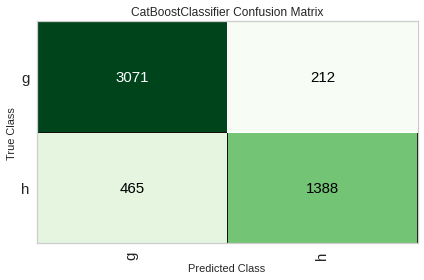

In [ ]:
pyc.plot_model(tuned_model_clf, plot='confusion_matrix')

The following plot shows us some metrics (Precision, Recall, and F1 score) for the separate original classes. It also shows the Support of each class (number of elements in each class originally).  

The model has some problems to work with class 7.

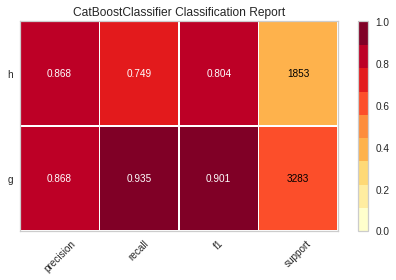

In [ ]:
pyc.plot_model(tuned_model_clf, plot='class_report')

Now, we can see the Feature Importances. Since we are using a model based on Decision Trees, it is possible to calculate the decrease on variance after each node of the tree. The features that make the variance decrease the most will show a higher importance.  

This plot (`plot='feature'`) only shows the ten most important features. If we wanted the full list, we should have used `plot='feature_all'`.

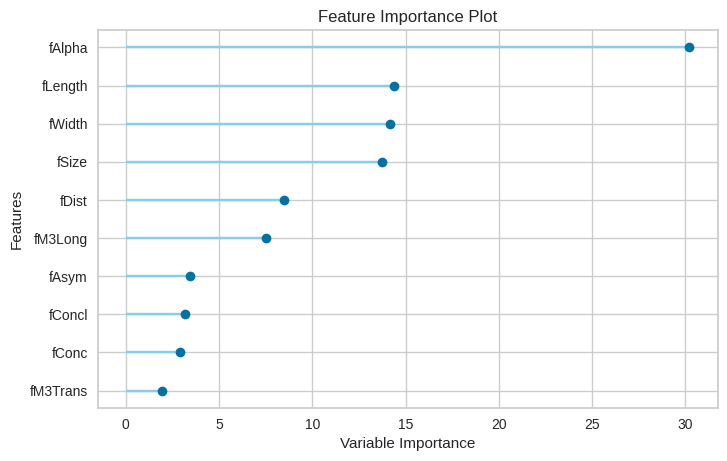

In [ ]:
pyc.plot_model(tuned_model_clf, plot='feature_all')

Another plot we can produce shows the predictions for each of the original classes. We can see the fraction of elements that were correctly (or not) predicted to be in each of the classes.

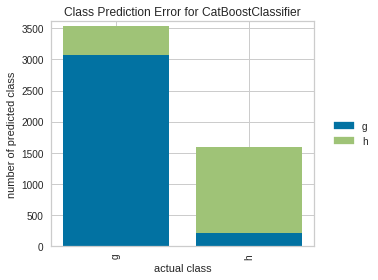

In [ ]:
pyc.plot_model(tuned_model_clf, plot='error')

Finally, we can print the parameters of the trained model. For the moment, they are not that relevant to us, but we might use them to compare it to other realizations of itself.

In [ ]:
pyc.plot_model(tuned_model_clf, plot='parameter')

,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,180
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


In [ ]:
tuned_model_clf

Now, using the task `predict_model`, we can obtain a DataFrame with the predicted values for the Test subset. With `raw_score=True`, we can get the score (or probability) for an element to be in each of the classes.

In [ ]:
pyc.predict_model(tuned_model_clf, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8682,0.9271,0.7491,0.8675,0.8039,0.7055,0.7098


,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class,Label,Score_g,Score_h
0,-0.958344,-0.411902,-1.430272,1.575573,1.345340,-0.126073,-0.610563,0.282695,-0.573509,-0.046067,h,g,0.9025,0.0975
1,0.110607,-0.422602,0.277462,-0.288264,-0.448665,-0.188023,-0.637889,-0.439507,-0.326474,0.090407,g,g,0.8880,0.1120
2,1.537724,-0.501378,0.041462,-0.419782,-0.515887,-0.952121,-1.836257,0.416467,1.712064,0.236576,h,h,0.0355,0.9645
3,1.896168,2.444645,2.282330,-2.138325,-1.936196,-0.968440,-2.982059,5.176297,1.228887,1.167622,h,h,0.0120,0.9880
4,1.278194,1.064526,1.910572,-1.541813,-1.597536,-0.651706,1.422108,0.829162,-1.316997,1.260645,g,g,0.9869,0.0131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131,-0.658518,-1.627373,-0.428688,0.834315,0.935993,-0.463875,-0.193781,-0.293557,-1.224389,-0.821559,h,h,0.2971,0.7029
5132,-1.063407,-1.658827,-1.795027,1.737640,1.674555,0.401753,-0.031042,0.290322,-0.677649,0.533284,g,g,0.8804,0.1196
5133,-0.640665,0.711716,-0.243596,-0.024758,-0.118653,-0.246683,-0.641467,0.833314,1.557719,0.450816,h,h,0.2323,0.7677
5134,1.235873,0.854752,0.897704,-0.884962,-0.769245,-1.864145,0.815642,-1.054754,-0.625160,1.598923,h,g,0.7622,0.2378


## Finalize the model

After checking that the predictions look reasonable, we want to finalize the model. In the context of PyCaret, this means that the system will combine both Training and Test subsets and will re-train the model with this new dataset. In general, this will create a better model, given that we are using more data than before.

In [ ]:
final_model_clf = pyc.finalize_model(tuned_model_clf)

After this step, we cannot use the Test set for obtaining predictions. It has been used for training, thus any score taken from it will be biased.  

That is the reason to create a Validation subset. We can use the trained model into it to get our `final` predictions.

In [ ]:
validation_prediction_clf = pyc.predict_model(final_model_clf, data=data_validation_clf, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0,0.9329,0,0,0,0,0


Now, to assess the predictions we have just made, we can create a confusion matrix with the validation data. Since this dataset was left out of PyCaret, we need to create this plot by ourselves.

In [ ]:
cm_mat_val_large = np.array([[np.sum(np.array(validation_prediction_clf['Label'] == col_num) &
                                     np.array(validation_prediction_clf['Class'] == row_num)) for col_num in ['g', 'h']] for row_num in ['g', 'h']])

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)

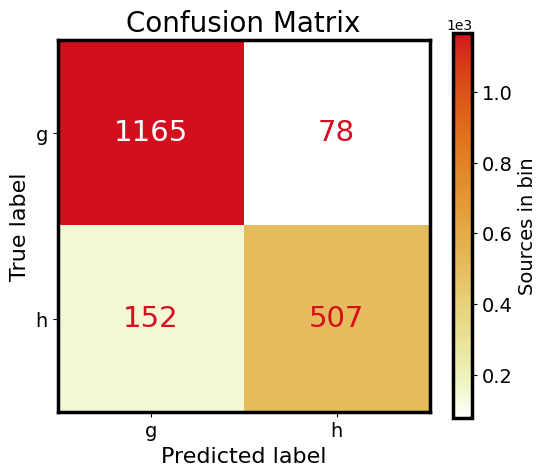

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig             = plt.figure(figsize=(6,5))
ax1             = fig.add_subplot(111)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mat_val_large,
                              display_labels=['g', 'h'])


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp_b = disp.plot(include_values=True,
                 cmap=cm.get_cmap('cet_CET_L18'), ax=ax1, xticks_rotation='horizontal')

for text_val in disp_b.text_.flatten():
    text_val.set_fontsize(21)
clb = plt.gca().images[-1].colorbar
clb.ax.tick_params(labelsize=14)
clb.ax.ticklabel_format(style='sci', scilimits=(0, 0))
clb.outline.set_linewidth(2.5)
clb.ax.set_ylabel('Sources in bin', size=14)

ax1.xaxis.get_label().set_fontsize(16)
ax1.yaxis.get_label().set_fontsize(16)

ax1.tick_params(axis='both', which='major', labelsize=14)

plt.setp(ax1.spines.values(), linewidth=2.5)
plt.setp(ax1.spines.values(), linewidth=2.5)
ax1.set_title('Confusion Matrix', fontsize=20)
plt.show()

## Save the model

In [ ]:
# pyc.save_model(final_model_clf, 'model_final_clf_example')  # Model (it will be saved with .pkl extension)
# pyc.save_config('config_final_clf_example')  # Configuration file

In [ ]:
# pyc.load_config('config_final_clf_example')

In [ ]:
# final_model_clf = pyc.load_model('model_final_clf_example')

## Regression

For the case of regression, the steps are mostly the same as before.

In [ ]:
data_train_test_reg = data_reg.sample(frac=0.9, random_state=seed)  # Train + test sets
data_validation_reg = data_reg.drop(data_train_test_reg.index)  # Validation data

print('Shape of used data')
print('-' * 40)
print(f'Full Dataset size: {data_reg.shape}')
print(f'Data for Modeling (Train and Test): {data_train_test_reg.shape}')
print(f'Unseen Data For Validation: {data_validation_reg.shape}')
print('-' * 40)

Shape of used data
----------------------------------------
Full Dataset size: (6000, 8)
Data for Modeling (Train and Test): (5400, 8)
Unseen Data For Validation: (600, 8)
----------------------------------------


Pay attention that, now, we are using the `Regression` sub-module of PyCaret, the dataset is different and the target feature is the price of the diamonds.

In [ ]:
exp_reg = pyr.setup(data=data_train_test_reg, target='Price', session_id=seed, silent=True,
                    feature_selection=True, feature_selection_method='boruta',
                    transformation=True, transformation_method='yeo-johnson', n_jobs=-1,
                    normalize=True, normalize_method='zscore', use_gpu=False)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 14)"


In [ ]:
pyr.get_config('X').columns

Index(['Carat Weight', 'Cut_Signature-Ideal', 'Color_D', 'Color_E', 'Color_H',
       'Color_I', 'Clarity_FL', 'Clarity_IF', 'Clarity_SI1', 'Clarity_VS1',
       'Clarity_VS2', 'Clarity_VVS1', 'Clarity_VVS2', 'Symmetry_EX'],
      dtype='object')

For Regressions, the list of available models is longer.

In [ ]:
pyr.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


It is not possible to use the same metrics for Regression and Classifiction. For this section, we will select the `R2` score (https://en.wikipedia.org/wiki/Coefficient_of_determination), which will have a higher value for better predictions.

In [ ]:
top_model_reg = pyr.compare_models(n_select=1, sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,816.2019,2.639523e+06,1592.5629,0.9746,0.0808,0.0621,1.878
et,Extra Trees Regressor,888.8313,2.735769e+06,1634.1174,0.9737,0.0928,0.0701,0.721
xgboost,Extreme Gradient Boosting,871.6711,3.098912e+06,1737.8511,0.9702,0.0850,0.0648,0.923
rf,Random Forest Regressor,905.6011,3.289465e+06,1774.9888,0.9686,0.0917,0.0694,0.765
gbr,Gradient Boosting Regressor,990.5244,3.767617e+06,1919.4605,0.9637,0.1050,0.0807,0.170
lightgbm,Light Gradient Boosting Machine,939.1402,4.238390e+06,2013.4399,0.9593,0.0903,0.0680,0.145
dt,Decision Tree Regressor,1035.6771,4.759556e+06,2110.2650,0.9546,0.1071,0.0787,0.022
knn,K Neighbors Regressor,1122.3098,6.007148e+06,2425.5181,0.9421,0.1148,0.0833,0.098
ada,AdaBoost Regressor,4021.1270,2.409823e+07,4899.6517,0.7651,0.4660,0.5291,0.182
ridge,Ridge Regression,3384.0283,2.452926e+07,4943.4134,0.7613,0.6539,0.4148,0.019


In [ ]:
tuned_model_reg = pyr.tune_model(top_model_reg, early_stopping='asha', optimize='RMSE')#,
#                                 search_library='tune-sklearn', search_algorithm='random')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,738.2339,1.778189e+06,1333.4874,0.9798,0.0826,0.0653
1,832.9522,2.119667e+06,1455.9075,0.9771,0.0882,0.0684
2,918.9013,2.838997e+06,1684.9323,0.9759,0.0911,0.0694
3,794.2783,1.773547e+06,1331.7458,0.9823,0.0943,0.0703
4,957.0598,5.796518e+06,2407.5958,0.9445,0.0917,0.0682
5,918.4039,3.725942e+06,1930.2699,0.9693,0.0924,0.0690
6,874.3445,3.036324e+06,1742.5051,0.9705,0.0937,0.0724
7,852.5356,3.237501e+06,1799.3058,0.9651,0.0913,0.0713
8,914.6411,2.875596e+06,1695.7582,0.9722,0.0919,0.0708


The plots that we can create for Regression are different from the ones from Classification.  

The first plot we can see shows a comparison between the true and predicted values for the Test set. The prediction, as we can see, is pretty good for lower values but it worsens a bit towards higher quantities.

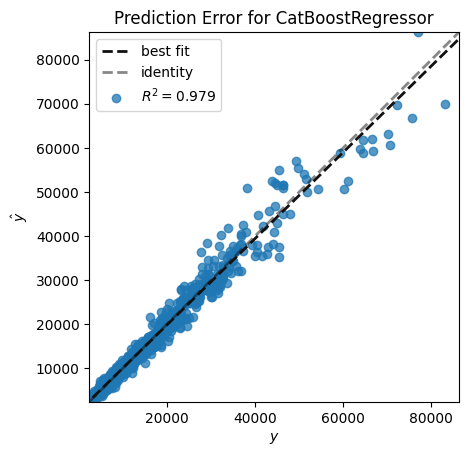

In [ ]:
pyr.plot_model(tuned_model_reg, plot='error')

Another plot shows the residuals ($Y_{\mathrm{True}} - Y_{\mathrm{Predicted}}$) for the predictions on the Test set.

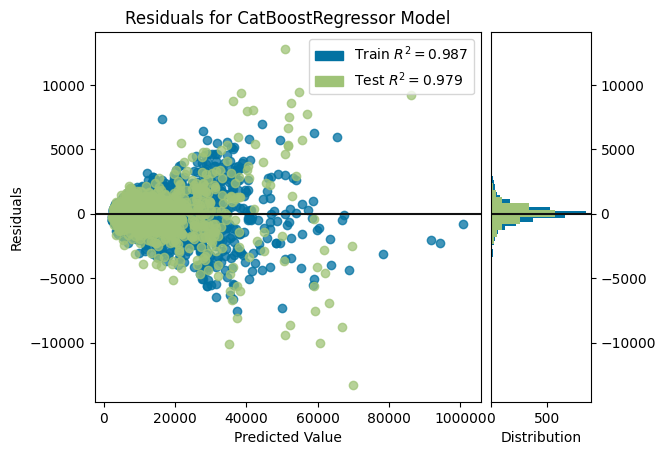

In [ ]:
pyr.plot_model(tuned_model_reg, plot='residuals')

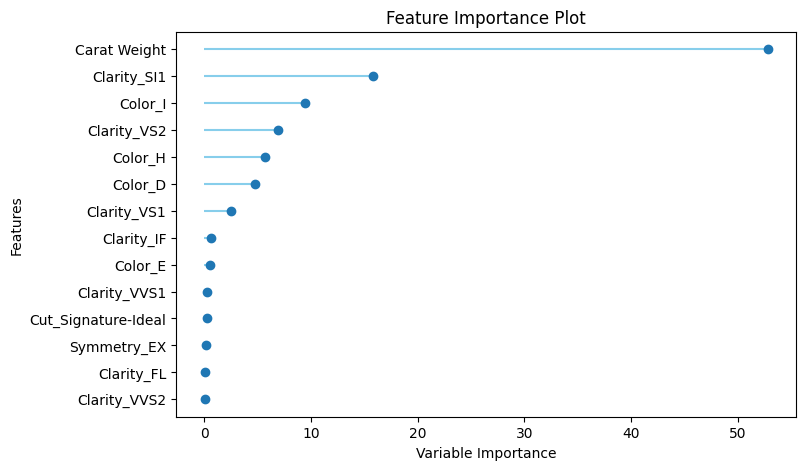

In [ ]:
pyr.plot_model(tuned_model_reg, plot='feature_all')

In [ ]:
pyr.plot_model(tuned_model_reg, plot='parameter')

,Parameters
nan_mode,Min
eval_metric,RMSE
iterations,180
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


In [ ]:
pyr.predict_model(tuned_model_reg)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,807.9372,2.329620e+06,1526.3094,0.9788,0.0882,0.0673


,Carat Weight,Cut_Signature-Ideal,Color_D,Color_E,Color_H,Color_I,Clarity_FL,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Symmetry_EX,Price,Label
0,-1.094139,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4027,4155.590255
1,-0.513378,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,9514,10080.207975
2,1.565279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,35742,33115.517544
3,0.000427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,9746,9571.224140
4,-0.658933,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5085,5367.052565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,-1.094139,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5450,4138.127215
1617,-0.408681,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4639,4828.299550
1618,0.674562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14196,12859.202452
1619,1.342257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,26970,28692.427597


## Finalize the model

In [ ]:
final_model_reg = pyr.finalize_model(tuned_model_reg)

We now use the final model on the Validation sub-set and create a plot to compare the values that have been obtained to the original ones.  
As before, and given that this dataset is outside of PyCaret, the plot to show this is created by us. And it is constructed as a density plot. That means that each small square (pixel) shows the density of points on that position of the plot.

In [ ]:
validation_prediction_reg = pyr.predict_model(final_model_reg, data=data_validation_reg)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,728.9271,1.531361e+06,1237.4815,0.9829,0.0818,0.0634


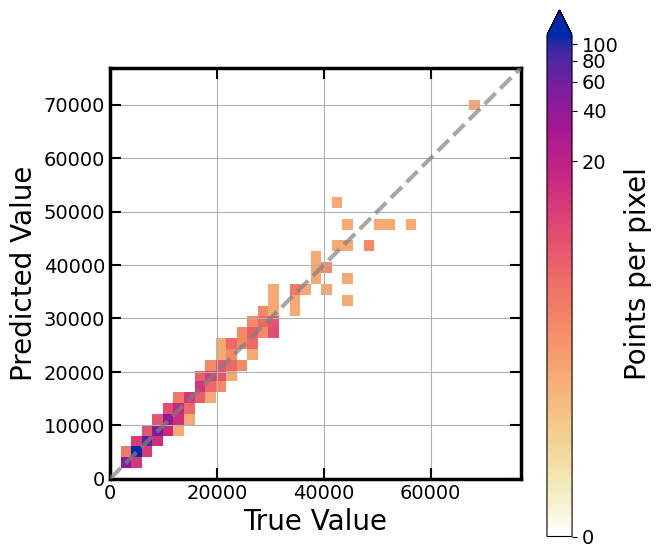

In [ ]:
fig             = plt.figure(figsize=(7,6))
ax1             = fig.add_subplot(111, projection='scatter_density')

max_val = np.nanmax([np.nanmax(validation_prediction_reg.loc[:, 'Price']), np.nanmax(validation_prediction_reg.loc[:, 'Label'])])

norm = ImageNormalize(vmin=0., stretch=LogStretch())

dens_1 = ax1.scatter_density(validation_prediction_reg.loc[:, 'Price'].sample(frac=1, random_state=seed),\
            validation_prediction_reg.loc[:, 'Label'].sample(frac=1, random_state=seed),\
            cmap=plt.get_cmap('cet_CET_L17'), zorder=0, dpi=10, alpha=1, norm=norm)
ax1.plot([-1, max_val*1.2], [-1, max_val*1.2], ls='--', marker=None, c='Gray', alpha=0.7, lw=3.0, zorder=20)

clb_b = plt.colorbar(dens_1, extend='max')
clb_b.ax.tick_params(labelsize=14)
clb_b.outline.set_linewidth(2.5)
# clb_b.ax.set_ylabel('Points per pixel', size=20)
clb_b.set_label('Points per pixel', size=20)

ax1.set_xlabel('True Value', fontsize=20)
ax1.set_ylabel('Predicted Value', fontsize=20)
ax1.tick_params(which='both', top=True, right=True, direction='in')
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(which='major', length=8, width=1.5)
ax1.tick_params(which='minor', length=4, width=1.5)
plt.setp(ax1.spines.values(), linewidth=2.5)
plt.setp(ax1.spines.values(), linewidth=2.5)
ax1.set_xlim(left=-0.3, right=max_val*1.1)
ax1.set_ylim(bottom=-0.3, top=max_val*1.1)
ax1.grid(zorder=0)
#ax1.set_aspect('equal', 'datalim')
ax1.set_aspect('equal', 'box')
fig.tight_layout()

## Save the model

In [ ]:
# pyr.save_model(final_model_reg, 'model_final_reg_example')  # Model (it will be saved with .pkl extension)
# pyr.save_config('config_final_reg_example')  # Configuration file

In [ ]:
# pyr.load_config('config_final_reg_example')

In [ ]:
# final_model_reg = pyr.load_model('model_final_reg_example')